In [1]:
# In this part of the course, we will be doing Visual Data Analysis to understand Telecom Churn problem
# https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12
# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')
# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns
sns.set()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [3]:
df = pd.read_csv('Data/telecomchurn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,...,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,...,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,...,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,...,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,...,8.41,10.1,3,2.73,3,False


In [5]:
features = ['Total day minutes','Total intl calls']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7F20EE048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7F41AA198>]], dtype=object)

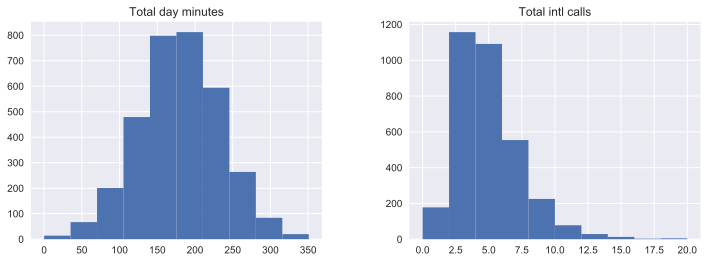

In [6]:
df[features].hist(figsize=(12,4))

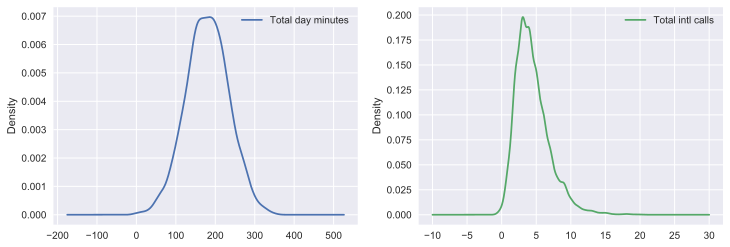

In [7]:
# In the above plot, Total intl calls is skewed on right
# Normal/ Gaussian distribution are the same
df[features].plot(kind='density', subplots=True, 
                  layout=(1, 2), sharex=False, figsize=(12, 4));

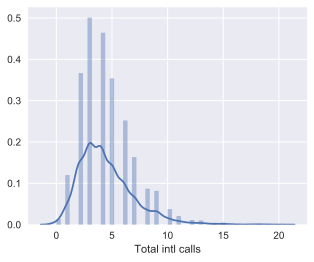

In [8]:
sns.distplot(df['Total intl calls']) #plots both histogram and density plot

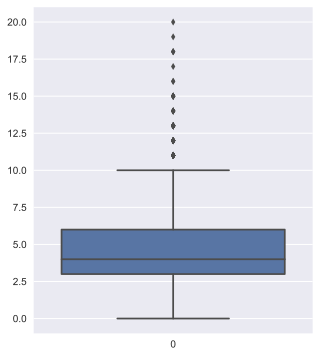

In [9]:
_ , ax = plt.subplots(figsize=(5,6))
sns.boxplot(data=df['Total intl calls'], ax=ax);

In [10]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,...,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,...,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,...,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,...,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,...,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


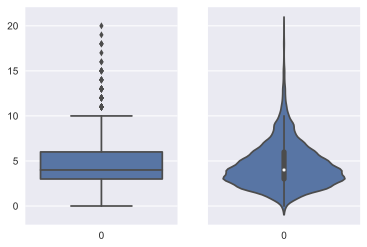

In [11]:
_, axes = plt.subplots(1,2,sharey=True, figsize=(6,4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

In [12]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [13]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

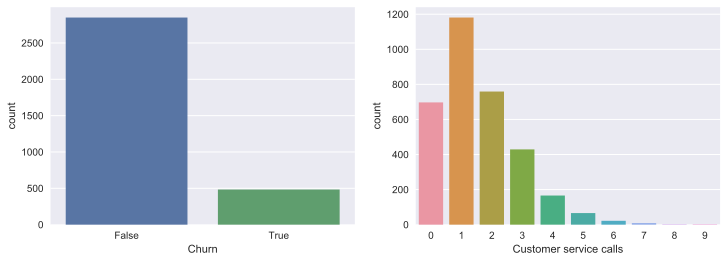

In [14]:
_,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
sns.countplot(x='Churn', data=df,ax=axes[0]);
sns.countplot(x='Customer service calls',data=df,ax=axes[1])

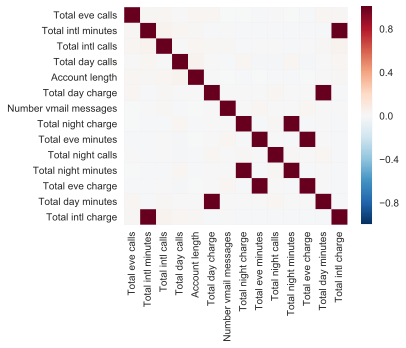

In [15]:
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 
                      'Voice mail plan', 'Area code', 'Churn',
                      'Customer service calls']))
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [16]:
numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 'Total night charge','Total intl charge']))

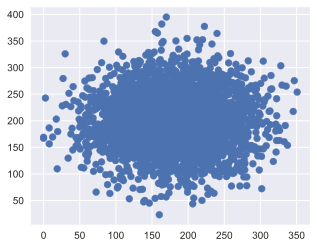

In [17]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

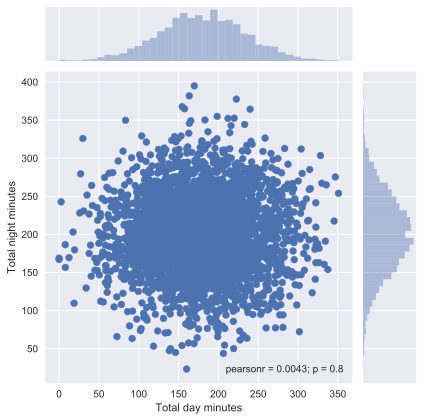

In [18]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='scatter');

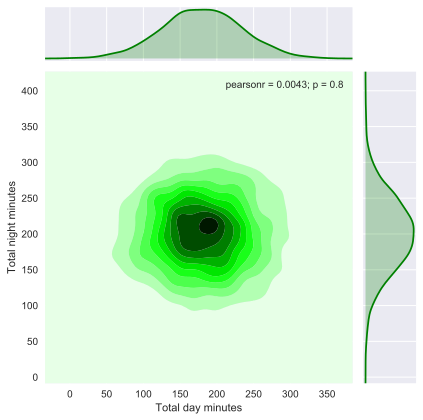

In [19]:
sns.jointplot('Total day minutes', 'Total night minutes',
              data=df, kind="kde", color="g");


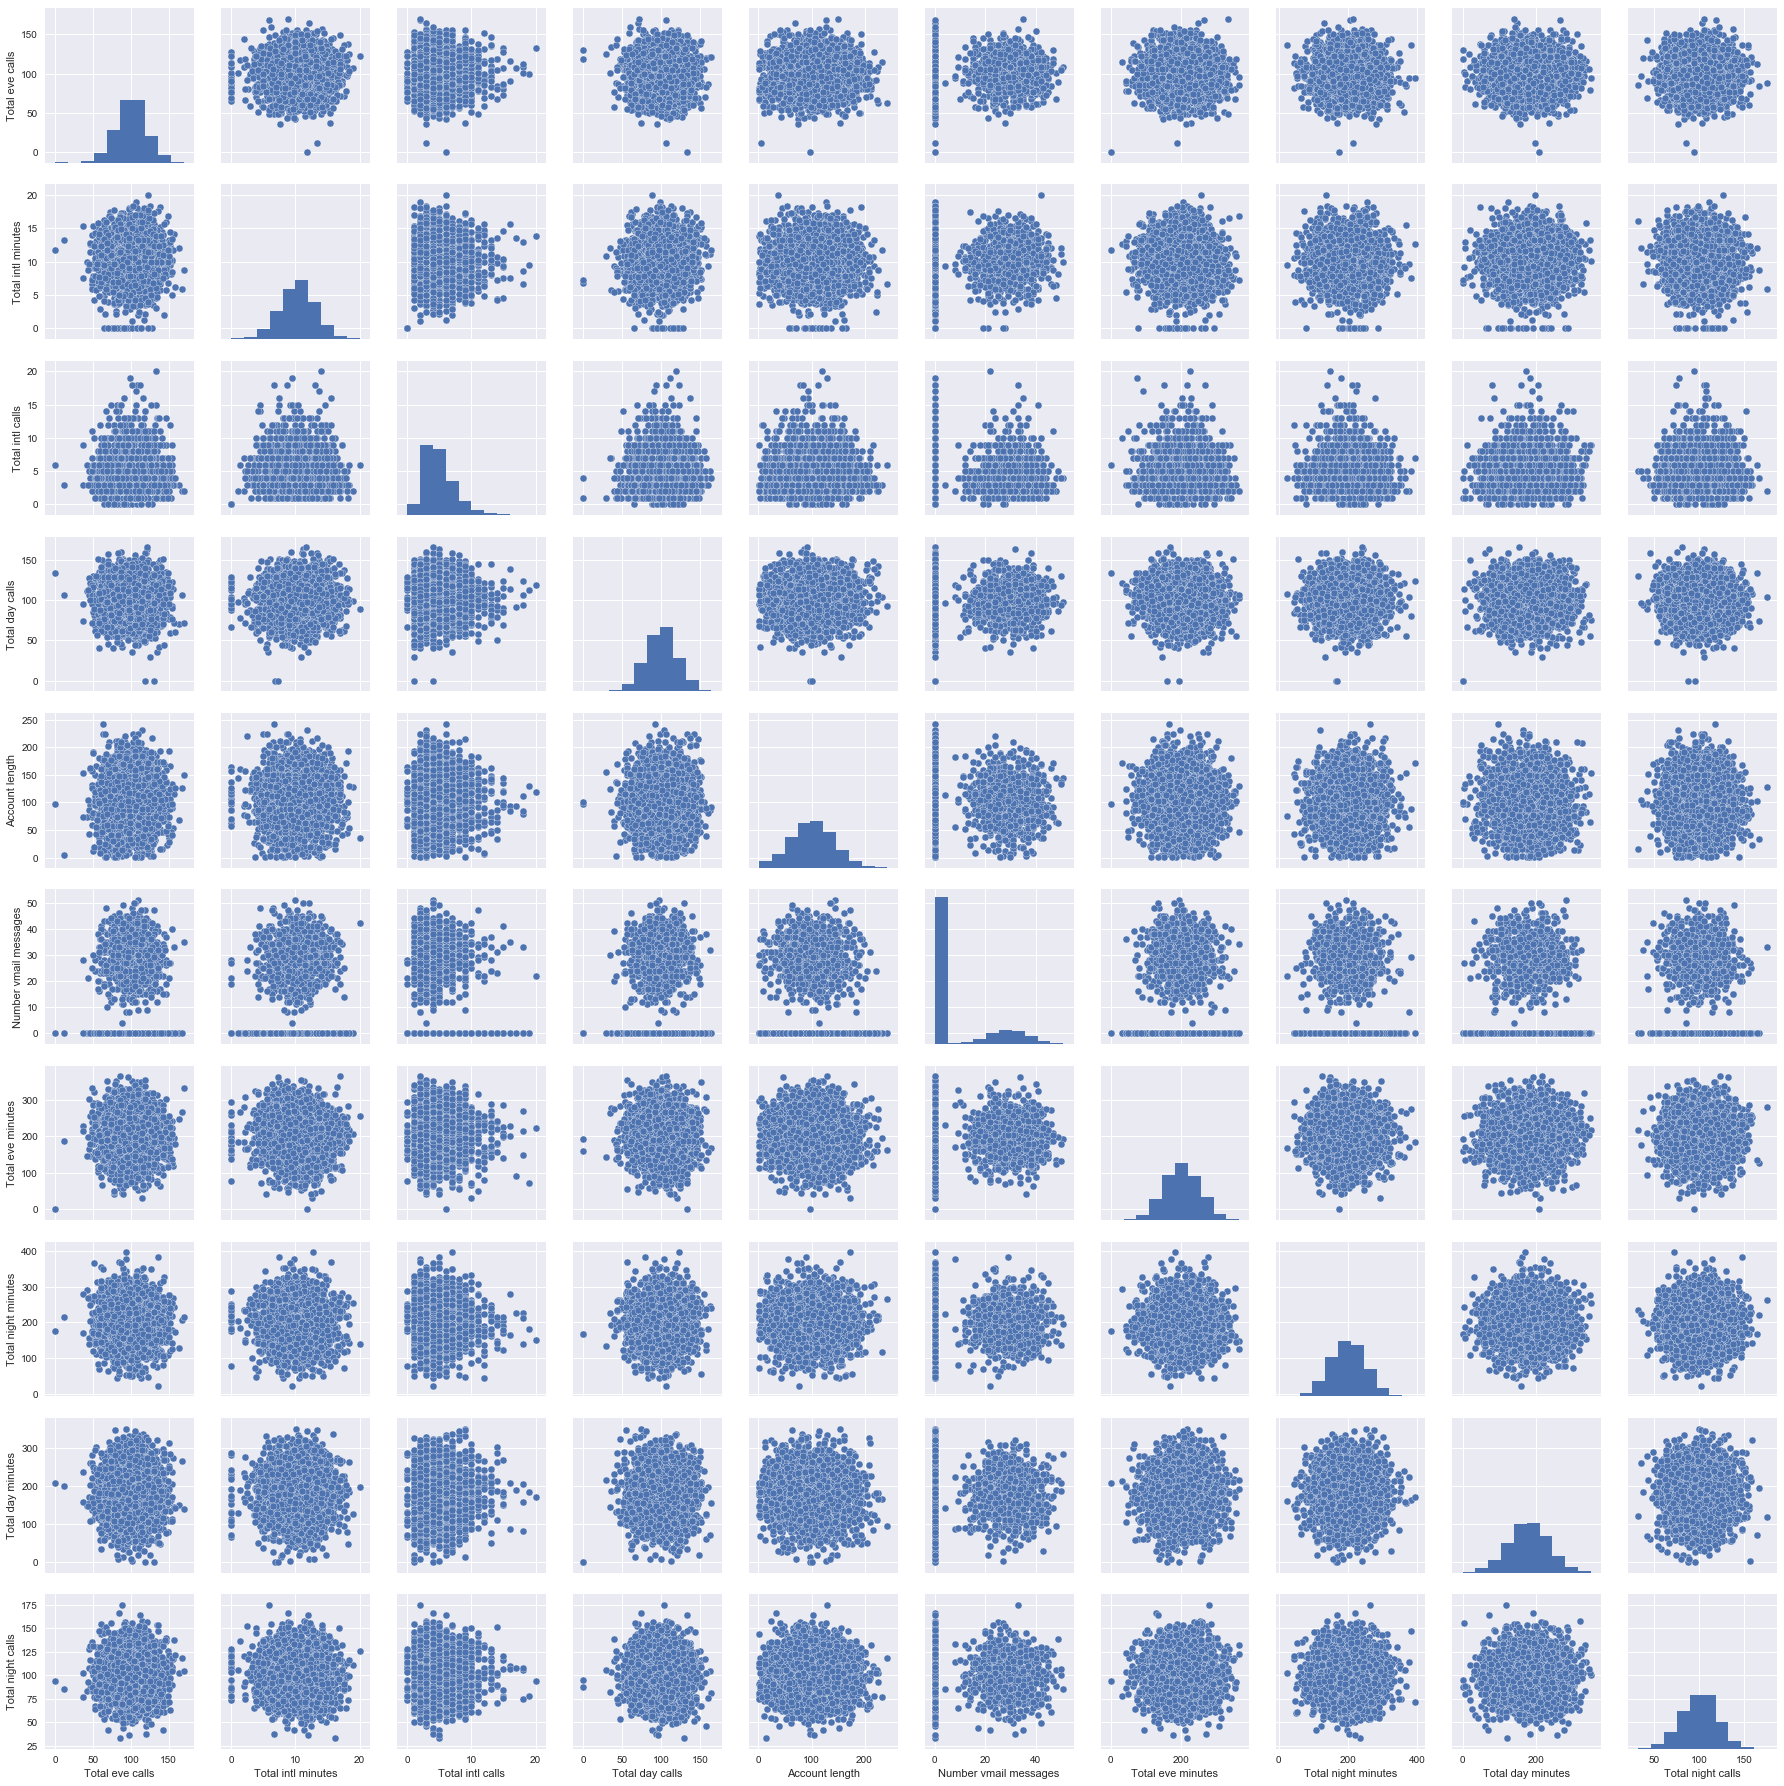

In [21]:
# pairplot may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[numerical]);

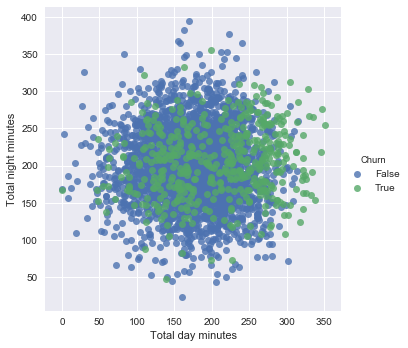

In [22]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, 
           hue='Churn', fit_reg=False);

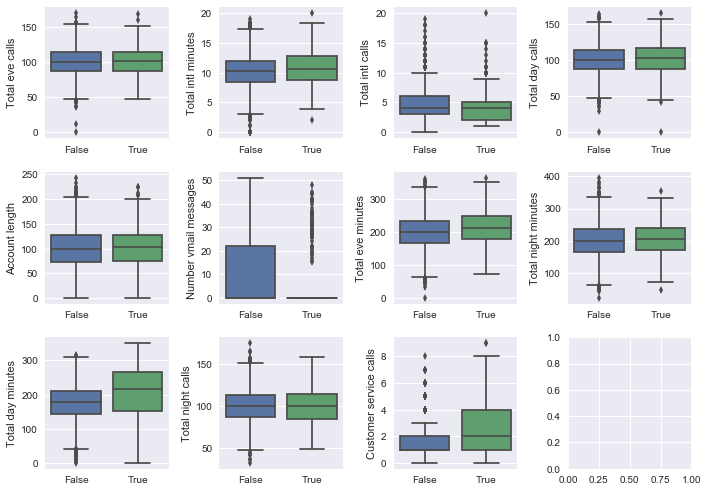

In [23]:
# Sometimes you can analyze an ordinal variable as numerical one
numerical.append('Customer service calls') 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax) 
    ax.set_xlabel('') 
    ax.set_ylabel(feat) 
fig.tight_layout();

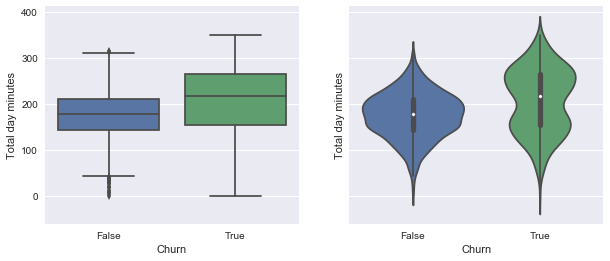

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.boxplot(x='Churn', y='Total day minutes',
            data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', 
               data=df, ax=axes[1]);

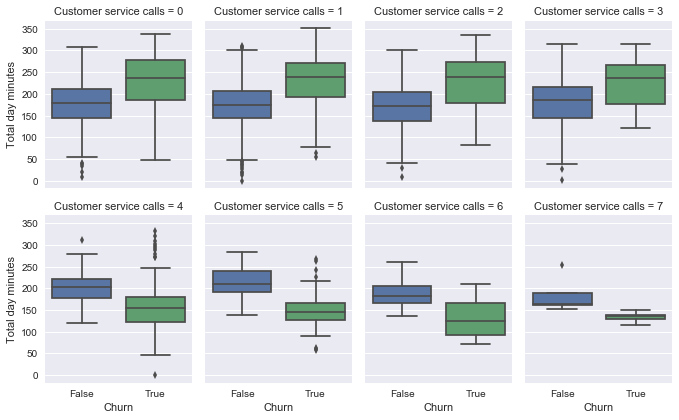

In [26]:
sns.factorplot(x='Churn', y='Total day minutes',
               col='Customer service calls',
               data=df[df['Customer service calls'] < 8], 
               kind="box", col_wrap=4, size=3, aspect=.8);

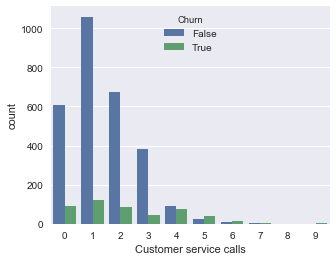

In [27]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

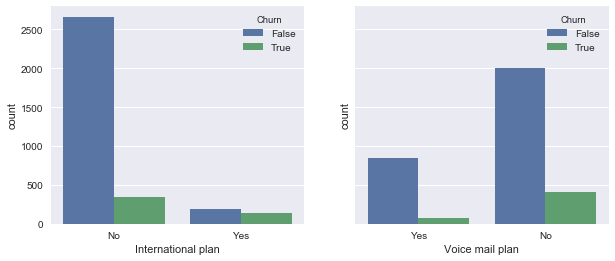

In [28]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.countplot(x='International plan', hue='Churn',
              data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn',
              data=df, ax=axes[1]);

In [29]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,...,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,
False,49,72,44,60,25,57,...,72,65,52,71,96,68
True,3,8,11,4,9,9,...,5,8,14,7,10,9


In [31]:
df.groupby(['State'])['Churn'].\
   agg([np.mean]).\
   sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,...,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,...,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [32]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [35]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].\
                          map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].\
                       map({'Yes': 1, 'No': 0})

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
%%time 
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)


Wall time: 2min 47s


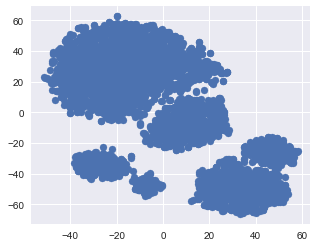

In [40]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

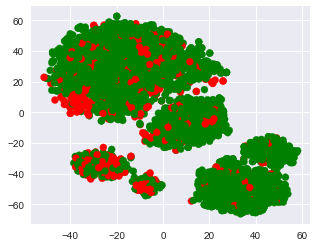

In [41]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=df['Churn'].map({False: 'green', True: 'red'}));

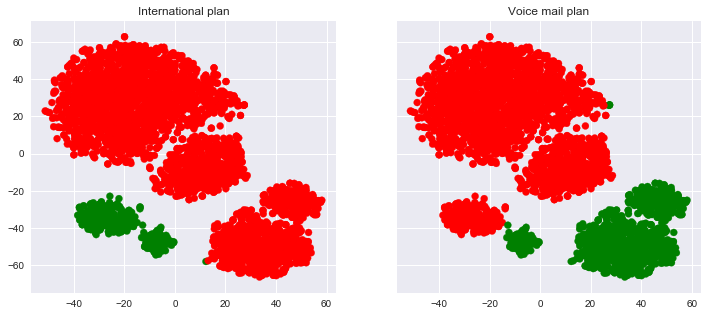

In [42]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'green', 'No': 'red'}))
    axes[i].set_title(name)